**Motion artifact** is a patient-based artifact that occurs with voluntary or involuntary patient movement during image acquisition.

Misregistration artifacts, which appear as **blurring, streaking, or shading**, are caused by patient movement during a CT scan. Blurring also occurs with patient movement during radiographic examinations.

If patient movement is voluntary, patients may require immobilization or sedation to prevent this.

Involuntary motion, such as respiration or cardiac motion, may cause artifacts that mimic pathology in surrounding structures. Techniques, such as cardiac gating, may be used for examinations that concern the mediastinum.

motion effects such as respiration, cardiac motion, and patient restlessness produce artifacts that appear as blurring, doubling, and distortion in the reconstructed images, and may lead to inaccurate diagnosis

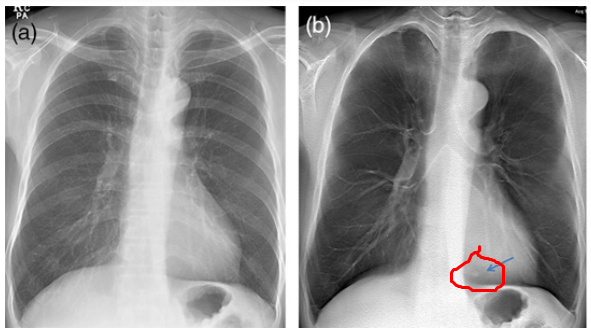


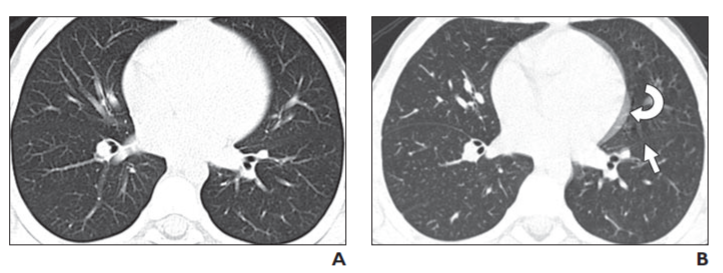

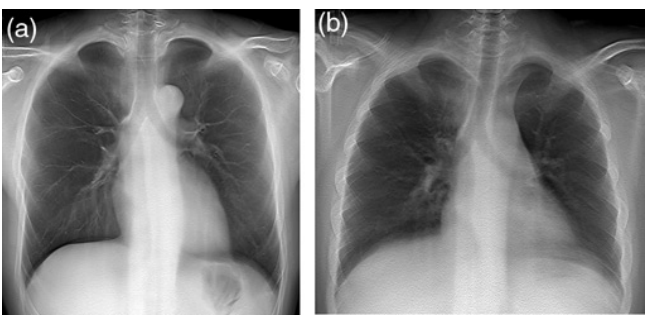

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import glob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


225
(512, 512, 3)


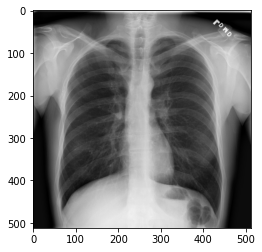

In [ ]:
####### Loading Image ###########

import os
path = "/content/drive/My Drive/Braynix/img/"

imgs_path = sorted([os.path.join(path, 'normal_img', file) for file in os.listdir(path + "normal_img") if file.endswith('.png')])
print(len(imgs_path))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = cv2.imread(imgs_path[7])


print(img.shape)
plt.imshow(img)

In [ ]:
############# Misc Function #################

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

    
# Display two images
def display_two(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

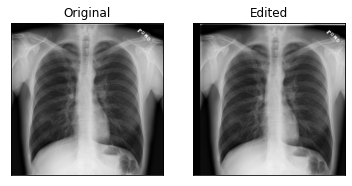

In [ ]:
######## Translation of Img ##########

height, width = img.shape[:2]
  
factor = 3
disp_y = np.random.randint(height/(40*factor),height/(20*factor))
disp_x = np.random.randint(width/40,width/20)
  
T = np.float32([[1, 0, disp_x], [0, 1, disp_y]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_trans = cv2.warpAffine(img, T, (width, height))

display_two(img, img_trans)



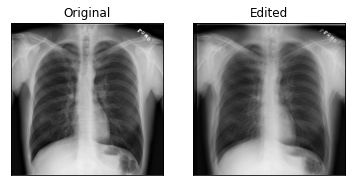

In [ ]:
alpha = 0.4
beta = 1.0 - alpha
img_motion = cv2.addWeighted(img, alpha, img_trans, beta, 0.0)
display_two(img, img_motion)

In [1]:
############# Degradation function ###############


def add_motion_noise (img, alpha = 0.4, factor = 3, plot = False):
  # Translation
  height, width = img.shape[:2]
  disp_y = np.random.randint(height/(40*factor),height/(20*factor))
  disp_x = np.random.randint(width/40,width/20)  
  
  if np.random.randint(0,2):
    disp_y = -disp_y
  else:
    disp_y = disp_y

  if np.random.randint(0,2):
    disp_x = -disp_x
  else:
    disp_x = disp_x
  
  # print(disp_x,disp_y)

  T = np.float32([[1, 0, disp_x], [0, 1, disp_y]])
  img_trans = cv2.warpAffine(img, T, (width, height))

  # Image bluring
  beta = 1.0 - alpha
  img_motion = cv2.addWeighted(img, alpha, img_trans, beta, 0.0)
  # print(img_motion.shape)
  margin = 3
  img_motion = img_motion[abs(disp_y) + margin:height-abs(disp_y)-margin,abs(disp_x)+margin:width-abs(disp_x)-margin,:]
  
  if plot:
    display_two(img, img_motion)

  return img_motion

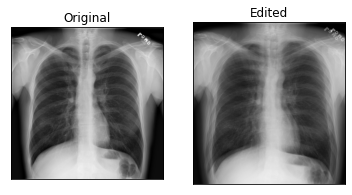

(498, 468, 3)


In [ ]:
img_motion = add_motion_noise(img,plot=True)
print(img_motion.shape)

In [ ]:
####### Saving te Images ########

destination = "/content/drive/My Drive/Braynix/img/motion_noise"
os.chdir(destination)

for i in range(len(imgs_path)):
  img = cv2.imread(imgs_path[i])
  img_motion = add_motion_noise(img)

  filename = "MoAT_" + str(i+1) + ".png"
  cv2.imwrite(filename,img_motion)